## Agenda

- Tokenization
- Stemming
- Lemmatization
    - Pattern
    - TextBlob
- POS Tagging
    - Pattern
    - TextBlob
- Stop Word removal

## Tokenizer
- Wie splittet man einfach einen Satz in Wörter auf?
- https://www.admin.ch/opc/de/classified-compilation/19995395/index.html#a8

In [1]:
import nltk
from nltk.tokenize import word_tokenize

In [2]:
verfassung = '''
Im Namen Gottes des Allmächtigen!

Das Schweizervolk und die Kantone,

in der Verantwortung gegenüber der Schöpfung,

im Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,

im Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,

im Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,

gewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,

geben sich folgende Verfassung:
'''

In [3]:
#verfassung = verfassung.decode('utf-8')
verfassung

'\nIm Namen Gottes des Allmächtigen!\n\nDas Schweizervolk und die Kantone,\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:\n'

### In einzelne Wörter + Zeichen

In [4]:
words = nltk.word_tokenize(verfassung)
words[0:10]

['Im',
 'Namen',
 'Gottes',
 'des',
 'Allmächtigen',
 '!',
 'Das',
 'Schweizervolk',
 'und',
 'die']

### In Wörter

In [5]:
'sven'.isalpha() #handelt es sich um einen alphanummerischen charakter == true

True

In [6]:
from nltk import *
sample ='der Mann ging zum Bäcker. der Bäcker ging zum Mann'
words = nltk.word_tokenize(sample)
words = [word.lower()for word in words if word.isalpha()]
FreqDist(words)

FreqDist({'der': 2, 'mann': 2, 'ging': 2, 'zum': 2, 'bäcker': 2})

In [7]:
from nltk.tokenize import word_tokenize
words = word_tokenize(verfassung)
words=[word.lower() for word in words if word.isalpha()]
words[0:20]

['im',
 'namen',
 'gottes',
 'des',
 'allmächtigen',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kantone',
 'in',
 'der',
 'verantwortung',
 'gegenüber',
 'der',
 'schöpfung',
 'im',
 'bestreben',
 'den',
 'bund']

In [8]:
"Sven".endswith("en")

True

### Hier noch ein paar praktische Python funktionen wie isalpha

|  s.startswith(t) | test if s starts with t |
|  ------ | ------ |
|  s.endswith(t) | test if s ends with t |
|  t in s | test if t is a substring of s |
|  s.islower() | test if s contains cased characters and all are lowercase |
|  s.isupper() | test if s contains cased characters and all are uppercase |
|  s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
|  s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
|  s.isdigit() | test if s is non-empty and all characters in s are digits |
|  s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

### In Sätze

In [9]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(verfassung)
sentences

['\nIm Namen Gottes des Allmächtigen!',
 'Das Schweizervolk und die Kantone,\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:']

## Stemming
- d.h. das überführen von Wörtern in den gleichen Stamm. 
- Übliche Probleme die Sprache so mit sich bringt:
    - Deklination: gehe, gehst, gehen, geht, ... es handelt sich um das gleiche Wort. 
    - Plural, Groß/Kleinschreibung: katze, katzen, Katze ... es handelt sich auch um das gleiche Wort. 
    - ...

In [10]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

### Porter stemmer
- geht ganz ok für Englisch
- https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

In [11]:
from nltk.corpus import udhr
engl_words = udhr.words("English-Latin1")
engl_words[0:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

In [12]:
[porter.stem(w) for w in engl_words][0:20]

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

### Lancaster Stemmer
- kommt zu leicht anderen "stämmen"
- funktioniert nicht so gut für deutsch

In [13]:
[lancaster.stem(w) for w in engl_words][0:20]

['univers',
 'decl',
 'of',
 'hum',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inh',
 'dign',
 'and',
 'of',
 'the',
 'eq',
 'and',
 'ina',
 'right',
 'of']

### Snowball stemmer
- Geht gut für deusch
- http://snowball.tartarus.org/algorithms/german/stemmer.html

In [14]:
snowball = nltk.stem.snowball.GermanStemmer()

In [15]:
[snowball.stem(w) for w in words][0:20]

['im',
 'nam',
 'gott',
 'des',
 'allmacht',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kanton',
 'in',
 'der',
 'verantwort',
 'gegenub',
 'der',
 'schopfung',
 'im',
 'bestreb',
 'den',
 'bund']

## Lemmatizer
- Zurückführen des Textes zu "Wörterbuchdefinitionen"

In [16]:
text = "Women in technologies areas are amazing at coding. Especially one woman is great, her name is Ursula Burns."
words = word_tokenize(text)
words_engl =[word.lower() for word in words if word.isalpha()]

In [17]:
nltk.download('wordnet')
from nltk import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_engl]
lemmas[0:20]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/TamaraMBP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['woman',
 'in',
 'technology',
 'area',
 'are',
 'amazing',
 'at',
 'coding',
 'especially',
 'one',
 'woman',
 'is',
 'great',
 'her',
 'name',
 'is',
 'ursula',
 'burn']

### Lematizer Deutsch NLTK
- Geht leider nicht für deusch :( in nltk

In [18]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
party_text = party_text.decode("UTF-8")
words = word_tokenize(party_text)
words_german =[word.lower() for word in words if word.isalpha()]

AttributeError: 'str' object has no attribute 'decode'

In [19]:
lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_german]
lemmas[0:20]

NameError: name 'words_german' is not defined

In [20]:
!pip install -U textblob
!pip install -U textblob-de

Requirement already up-to-date: textblob in /anaconda3/lib/python3.7/site-packages (0.15.3)
Requirement already up-to-date: textblob-de in /anaconda3/lib/python3.7/site-packages (0.4.3)


## Lemmatizer in Pattern
- Ähnlich wie NLTK funktioniert aber auch für deutsch
- https://www.clips.uantwerpen.be/pattern
- ```pip install pattern```
- Deutsche modelle kommen übrigens von der Uni Zürich https://www.zora.uzh.ch/id/eprint/28579/

In [21]:
!pip install pattern

  Using cached https://files.pythonhosted.org/packages/1e/07/b0e61b6c818ed4b6145fe01d1c341223aa6cfbc3928538ad1f2b890924a3/Pattern-3.6.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/8e/26/a6bd68f13e0f38fbb643d6e497fc3462be83a0b6c4d43425c78bb51a7291/backports.csv-1.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/9b/5db9a03e2088a87c26e3e4d4c7f7e8f4c2dbae610f9521cdfac15755a795/mysqlclient-1.4.5.tar.gz
    ERROR: Complete output from command python setup.py egg_info:
    ERROR: /bin/sh: mysql_config: command not found
    /bin/sh: mariadb_config: command not found
    /bin/sh: mysql_config: command not found
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/private/var/folders/dp/jktv40p11xbg4r3fp1hqpzfw0000gn/T/pip-install-abu5ad41/mysqlclient/setup.py", line 16, in <module>
        metadata, options = get_config()
      File "/private/var/folders/dp/jktv40p11xbg4r3fp1hqpzfw0000gn/T/pip-install

In [22]:
from pattern.de import parse

ModuleNotFoundError: No module named 'pattern'

In [23]:
text = "Richtungen Richtung."
s = parse(text, relations=True, lemmata=True)
s

TypeError: 'module' object is not callable

In [24]:
lemmata = []
from pattern.de import parsetree
s = parsetree(party_text,relations=True, lemmata=True) 
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            #print("%s (%s)" %(word,word.lemma))
            lemmata.append(word.lemma)
lemmata[0:20]

ModuleNotFoundError: No module named 'pattern'

## Lemmatizer in Textblob
 - https://textblob.readthedocs.io/en/dev/quickstart.html
 - ```pip install -U textblob```
 - ```pip install -U textblob-de```
 - https://github.com/markuskiller/textblob-de

In [25]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
from textblob_de import TextBlobDE
from textblob_de import PatternParser
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob.parse()
list(blob.words.lemmatize())[0:20]

['kurz',
 'vor',
 '22.00',
 'Uhr',
 'sein',
 'Polizist',
 'der',
 'Stadtpolizei',
 'in',
 'all',
 'Richtungen',
 'aber',
 'vor',
 'all',
 'in',
 'Richtung',
 'Kreis',
 '9',
 'ausgerückt',
 'Grund']

## POS Tagging (Part of Speech Tagging)
- Ich bin nur interessiert an Substantiven oder Adjektiven oder Verben. 
- Wie kann ich nur diese filtern? 
- Funktioniert für Deutsch nicht auf Anhieb in NLTK :(
- aber gut in pattern und textblob

## Übersicht
https://www.clips.uantwerpen.be/pages/mbsp-tags

|  Tag | Description | Example |
|  ------ | ------ | ------ |
|  **CC** | conjunction, coordinating | and, or, but |
|  **CD** | cardinal number | five, three, 13% |
|  **DT** | determiner | the, a, these |
|  **EX** | existential there | there were six boys |
|  **FW** | foreign word | mais |
|  **IN** | conjunction, subordinating or preposition | of, on, before, unless |
|  **JJ** | adjective | nice, easy |
|  **JJR** | adjective, comparative | nicer, easier |
|  **JJS** | adjective, superlative | nicest, easiest |
|  **LS** | list item marker |  |
|  **MD** | verb, modal auxillary | may, should |
|  **NN** | noun, singular or mass | tiger, chair, laughter |
|  **NNS** | noun, plural | tigers, chairs, insects |
|  **NNP** | noun, proper singular | Germany, God, Alice |
|  **NNPS** | noun, proper plural | we met two Christmases ago |
|  **PDT** | predeterminer | both his children |
|  **POS** | possessive ending | s |
|  **PRP** | pronoun, personal | me, you, it |
|  **PRP** | pronoun, possessive | my, your, our |
|  **RB** | adverb | extremely, loudly, hard |
|  **RBR** | adverb, comparative | better |
|  **RBS** | adverb, superlative | best |
|  **RP** | adverb, particle | about, off, up |
|  **SYM** | symbol | % |
|  **TO** | infinitival to | what to do? |
|  **UH** | interjection | oh, oops, gosh |
|  **VB** | verb, base form | think |
|  **VBZ** | verb, 3rd person singular present | she thinks |
|  **VBP** | verb, non-3rd person singular present | I think |
|  **VBD** | verb, past tense | they thought |
|  **VBN** | verb, past participle | a sunken ship |
|  **VBG** | verb, gerund or present participle | thinking is fun |
|  **WDT** | wh-determiner | which, whatever, whichever |
|  **WP** | wh-pronoun, personal | what, who, whom |
|  **WP** | wh-pronoun, possessive | whose, whosever |
|  **WRB** | wh-adverb | where, when |
|  **.** | punctuation mark, sentence closer | .;?* |
|  **,** | punctuation mark, comma | , |
|  **:** | punctuation mark, colon | : |
|  **(** | contextual separator, left paren | ( |
|  **)** | contextual separator, right paren | ) |

### POS tags in textblob

In [63]:
text_rep = '''Das bekamen etwa die Manager von Daimler im Februar 2018 zu spüren. Da hatte es ein Marketing­mitarbeiter gewagt, eine Mercedes-Werbung auf Instagram mit einem Zitat des Dalai Lama zu schmücken. «Betrachte die Situation von allen Seiten, und du wirst offener», riet der Autor den Lesern. Doch aus Sicht der Pekinger Regierung ist schon die Erwähnung des «Separatisten» Dalai Lama ein Verbrechen. Binnen Stunden erhob sich ein Shitstorm, und die Volks­zeitung, das Sprachrohr der kommunistischen Partei, erklärte Daimler zum «Volksfeind». Umgehend nannte der Daimler-Vorstand den harmlosen Sinn­spruch «eine extrem falsche Botschaft», und Dieter Zetsche, bis vor kurzem Konzernchef, erklärte, er «bereue zutiefst das Leid, das der unsensible Fehler über das chinesische Volk gebracht hat».

Ähnlich erging es dem Kamera­hersteller Leica im vergangenen April. Ein im Auftrag der Firma erstellter PR-Film warb mit welt­berühmten Fotografien, darunter auch jenes Bild vom einsamen Demonstranten, der sich 1989 auf dem Tiananmen-Platz in Peking den Panzern entgegen­stellt. Prompt erhob sich auch dagegen der national gesteuerte Protest, und die Firma sah sich gezwungen, sich von «den Inhalten distanzieren» zu müssen, und bedauerte «alle Missverständnisse oder falschen Schlussfolgerungen, die gezogen wurden».

VW-Chef Herbert Diess machte sich für das Wohl­gefallen der chinesischen Herren sogar vor laufender Kamera lächerlich. Als ein BBC-Reporter ihn im April fragte, wie er eine Fabrik in Xinjiang betreiben könne, wo China mehr als eine Million muslimischer Uiguren gefangen hält, behauptete er kurzerhand: «Davon weiss ich nichts.» Kurz darauf erklärte ein Konzern­sprecher, Diess wisse es natürlich besser. Aber der TV-Beitrag ist unmissverständlich.

Kein Wunder also, dass die gemeinsame China-Politik der Europäer nicht weit gediehen ist. Zwar haben sich alle Mitglieds­staaten im April verpflichtet, Direkt­investitionen aus Nicht-EU-Ländern der EU-Kommission zu melden. Aber auf klare Regeln für mögliche Verbote mochte sie sich nicht festlegen. Die Kommission darf nur beraten – doch sie darf nicht eingreifen.

Ginge es nach den Brüsseler Kommissaren, dann würde die EU auch hart dagegen vorgehen, dass europäische Investoren in China engeren Grenzen unterliegen als umgekehrt. Noch sperrt die chinesische Regierung dreizehn Wirtschafts­sektoren – von der Agrarproduktion über den Flugbetrieb bis zu den Medien – für ausländische Unternehmen. Europäer können auch nicht in die wichtigen chinesischen Staats­unternehmen einsteigen, während den chinesischen Staatsfirmen umgekehrt die privaten Firmen in Europa offenstehen. Seit fünf Jahren verhandelt die Kommission darum ein Investitions­abkommen mit China. Aber noch ist nicht viel passiert.

So folgt die EU in Schlangen­linien den Interessen ihrer Mitglieder. Doch das kann nicht mehr lange gut gehen. Denn jetzt eskaliert der Wirtschafts­krieg zwischen der alten Super­macht im Westen – den USA – und der neuen Macht im Osten – China. Und Europa droht dabei zum Schlachtfeld zu werden.'''


In [91]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(text_rep, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags:
    if "NN" in word[1]:
        substantive.append(word[0])
    if "V" in word[1]:
        verben.append(word[0])
    if "JJ" in word[1]:
        adjektive.append(word[0])

In [92]:
substantive

['bekamen',
 'Manager',
 'Daimler',
 'Februar',
 'Marketing\xadmitarbeiter',
 'Mercedes-Werbung',
 'Zitat',
 'Dalai',
 'Lama',
 '«',
 'Betrachte',
 'Situation',
 'Seiten',
 'offener',
 '»',
 'riet',
 'Autor',
 'Lesern',
 'Sicht',
 'Pekinger',
 'Regierung',
 'Erwähnung',
 '«',
 'Separatisten',
 '»',
 'Dalai',
 'Lama',
 'Verbrechen',
 'Binnen',
 'Stunden',
 'Shitstorm',
 'Volks\xadzeitung',
 'Sprachrohr',
 'Partei',
 'Daimler',
 '«',
 '»',
 'Daimler-Vorstand',
 'Sinn\xadspruch',
 '«',
 'Botschaft',
 '»',
 'Dieter',
 'Konzernchef',
 '«',
 'bereue',
 'zutiefst',
 'Leid',
 'Fehler',
 'Volk',
 '»',
 'Kamera\xadhersteller',
 'Leica',
 'April',
 'Auftrag',
 'Firma',
 'PR-Film',
 'warb',
 'welt\xadberühmten',
 'Fotografien',
 'jenes',
 'Bild',
 'Demonstranten',
 'Tiananmen-Platz',
 'Peking',
 'entgegen\xadstellt',
 'Prompt',
 'gesteuerte',
 'Protest',
 'Firma',
 '«',
 'Inhalten',
 'distanzieren',
 '»',
 'bedauerte',
 '«',
 'Missverständnisse',
 'Schlussfolgerungen',
 '»',
 'VW-Chef',
 'Herbert'

In [93]:
adjektive

['Instagram',
 'allen',
 'kommunistischen',
 'Volksfeind',
 'Umgehend',
 'harmlosen',
 'extrem',
 'falsche',
 'kurzem',
 'chinesische',
 'Ähnlich',
 'vergangenen',
 'erstellter',
 'einsamen',
 'Panzern',
 'national',
 'alle',
 'falschen',
 'chinesischen',
 'laufender',
 'lächerlich',
 'er',
 'nichts.',
 'unmissverständlich',
 'gemeinsame',
 'weit',
 'alle',
 'klare',
 'mögliche',
 'hart',
 'europäische',
 'chinesische',
 'Wirtschafts\xadsektoren',
 'Medien',
 'ausländische',
 'wichtigen',
 'chinesischen',
 'chinesischen',
 'privaten',
 'gut',
 'alten',
 'neuen']

In [94]:
verben

['spüren',
 'hatte',
 'gewagt',
 'schmücken',
 'ist',
 'erhob',
 'erklärte',
 'nannte',
 'Zetsche',
 'erklärte',
 'gebracht',
 'hat',
 'erhob',
 'sah',
 'gezwungen',
 'müssen',
 'gezogen',
 'wurden',
 'machte',
 'betreiben',
 'könne',
 'gefangen',
 'hält',
 'behauptete',
 'Davon',
 'darauf',
 'ist',
 'ist',
 'Zwar',
 'haben',
 'verpflichtet',
 'melden',
 'mochte',
 'festlegen',
 'darf',
 'beraten',
 'darf',
 'eingreifen',
 'dann',
 'würde',
 'vorgehen',
 'unterliegen',
 'können',
 'einsteigen',
 'verhandelt',
 'darum',
 'ist',
 'folgt',
 'kann',
 'gehen',
 'droht',
 'werden']

## Stop word removal


In [95]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/TamaraMBP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Englisch

In [97]:
stopwords.words('english')[0:100]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [99]:
words_engl = ["the", "big", "tree", "and", "the", "duck"]
filtered_words = [word for word in words_engl if word not in stopwords.words('english')]
filtered_words

['big', 'tree', 'duck']

### Deutsch

In [79]:
mylist = stopwords.words('german')

In [80]:
my_new_list = list(set(mylist)- set(["ich"]))
my_new_list

['zur',
 'jeden',
 'manche',
 'derselben',
 'auf',
 'jeder',
 'haben',
 'machen',
 'solche',
 'ihn',
 'sonst',
 'wo',
 'welcher',
 'anderr',
 'dich',
 'meinem',
 'meines',
 'hat',
 'dieselben',
 'euch',
 'seine',
 'solchem',
 'noch',
 'wollte',
 'mich',
 'dir',
 'ihres',
 'unter',
 'die',
 'damit',
 'allen',
 'einem',
 'ist',
 'deine',
 'da',
 'eures',
 'dein',
 'hatten',
 'könnte',
 'seinem',
 'seinen',
 'gegen',
 'dessen',
 'du',
 'muss',
 'bis',
 'keines',
 'alles',
 'dieser',
 'jene',
 'sie',
 'viel',
 'mit',
 'nun',
 'meiner',
 'unseres',
 'auch',
 'einiges',
 'diese',
 'ohne',
 'dass',
 'desselben',
 'hatte',
 'ob',
 'im',
 'dies',
 'keinen',
 'nichts',
 'man',
 'zum',
 'deinen',
 'keinem',
 'manchem',
 'solchen',
 'ihre',
 'sind',
 'nicht',
 'alle',
 'es',
 'sehr',
 'oder',
 'weiter',
 'weil',
 'manches',
 'bin',
 'ins',
 'solcher',
 'ander',
 'des',
 'vom',
 'dieses',
 'dem',
 'einiger',
 'seines',
 'waren',
 'während',
 'nach',
 'eines',
 'jetzt',
 'sollte',
 'als',
 'einen',


In [81]:
words_german = ["ich", "war", "im", "wald", "spazieren"]
filtered_words = [word for word in words_german if word not in stopwords.words('german')]
filtered_words

['wald', 'spazieren']

## Wordle 2.0

- Tokenization
- Lemmatization

In [82]:
text = (" ").join(udhr.words("German_Deutsch-Latin1"))
# tokenize and lemmatize
words = word_tokenize(text)
words_german =[word.lower() for word in words if word.isalpha()]
lemma = nltk.WordNetLemmatizer()
lemmas = [lemma.lemmatize(i) for i in words_german]
clean_blob = lemmas

- Numbers etc.. removal
- Stop word removal

In [83]:
from nltk.corpus import stopwords
words_alpha =[word.lower() for word in clean_blob if word.isalpha()]
stopwords = stopwords.words('german')
stopwords.append("jede")
result = [word for word in words_alpha if word not in stopwords]
result[0:20]

['allgemeine',
 'erklärung',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'präambel',
 'anerkennung',
 'angeborenen',
 'gleichen',
 'unveräußerlichen',
 'rechte',
 'mitglieder',
 'gemeinschaft',
 'menschen',
 'grundlage',
 'freiheit',
 'gerechtigkeit',
 'frieden',
 'welt']

In [84]:
result[0:20]

['allgemeine',
 'erklärung',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'präambel',
 'anerkennung',
 'angeborenen',
 'gleichen',
 'unveräußerlichen',
 'rechte',
 'mitglieder',
 'gemeinschaft',
 'menschen',
 'grundlage',
 'freiheit',
 'gerechtigkeit',
 'frieden',
 'welt']

In [85]:
text = (" ").join(result)

In [ ]:
 a = [123,
     123]

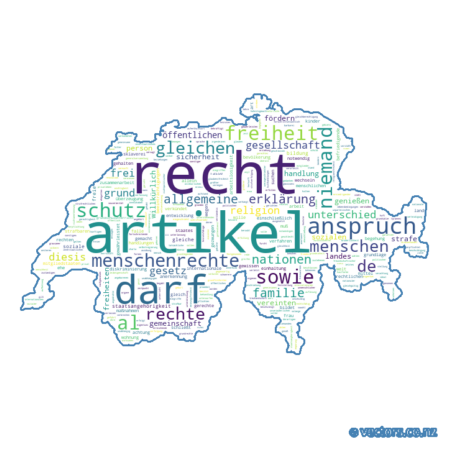

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=False, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [89]:
text_rep 

'Das bekamen etwa die Manager von Daimler im Februar 2018 zu spüren. Da hatte es ein Marketing\xadmitarbeiter gewagt, eine Mercedes-Werbung auf Instagram mit einem Zitat des Dalai Lama zu schmücken. «Betrachte die Situation von allen Seiten, und du wirst offener», riet der Autor den Lesern. Doch aus Sicht der Pekinger Regierung ist schon die Erwähnung des «Separatisten» Dalai Lama ein Verbrechen. Binnen Stunden erhob sich ein Shitstorm, und die Volks\xadzeitung, das Sprachrohr der kommunistischen Partei, erklärte Daimler zum «Volksfeind». Umgehend nannte der Daimler-Vorstand den harmlosen Sinn\xadspruch «eine extrem falsche Botschaft», und Dieter Zetsche, bis vor kurzem Konzernchef, erklärte, er «bereue zutiefst das Leid, das der unsensible Fehler über das chinesische Volk gebracht hat».\n\nÄhnlich erging es dem Kamera\xadhersteller Leica im vergangenen April. Ein im Auftrag der Firma erstellter PR-Film warb mit welt\xadberühmten Fotografien, darunter auch jenes Bild vom einsamen Demon

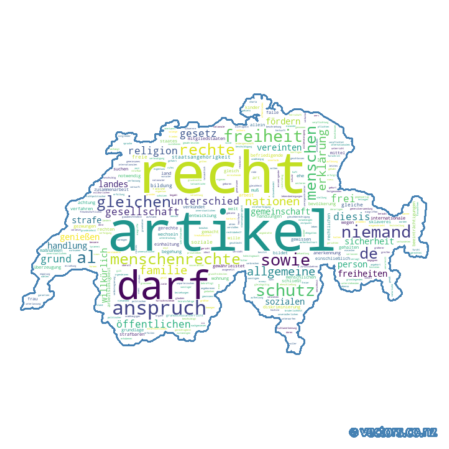

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=False, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()